In [1]:
#Curso Inteligência Artificial
#Curador: Prof. Dr. Marcelo Novaes de Rezende
#Trilha 2 - Regressão Logística

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import math

In [3]:
X=np.array([[0.5,0],[4,3],[3,2],[5,1],[2,1.8],[2,4],[3,3.2],[5,8],[4,5],[0,0.5]])
y=np.array([0,0,0,0,0,1,1,1,1,1])

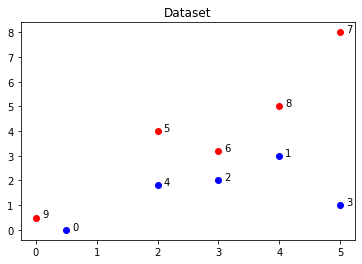

In [4]:
cor=['bo','ro']
plt.title('Dataset')
for i in range(len(X)):
  plt.text(X[i,0]+0.1,X[i,1],str(i))
  plt.plot(X[i,0],X[i,1],cor[y[i]])
plt.show()

In [ ]:
#treinando o modelo
reg_log=LogisticRegression()
reg_log.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#classificando a amostra de treinamento
ypred=reg_log.predict(X)
for i in range(len(X)):
  print(i,ypred[i])

0 0
1 0
2 0
3 0
4 0
5 1
6 1
7 1
8 1
9 0


In [ ]:
accuracy_score(y,ypred)

0.9

In [ ]:
#Obter os thetas do modelo (theta0:intercept_, os outros thetas estão em .coef_ )
reg_log.intercept_,reg_log.coef_

(array([-0.63976828]), array([[-0.78943197,  1.03284965]]))

In [ ]:
#probabilidade para a amostra [1,3] ser positiva
1/(1+math.exp(-(-0.6397682-0.78943197*1+1.03284965*3)))

0.8414889773098503

In [ ]:
#probabilidade da amostra [1,3] ser negativa e positiva usando .predict_proba
reg_log.predict_proba([[1,3]])

array([[0.15851103, 0.84148897]])

In [ ]:
#Portanto, com threshold 0.5, a amostra [1,3] será classificada como positiva
reg_log.predict([[1,3]])

array([1])

In [ ]:
#traçar a reta que separa as classes...vamos fazer uma função x2=f(x1)
#x2=-(theta1/theta2)x1-theta0/theta2
def x2(x1,theta0,theta1,theta2):
  return -(theta1/theta2)*x1-theta0/theta2

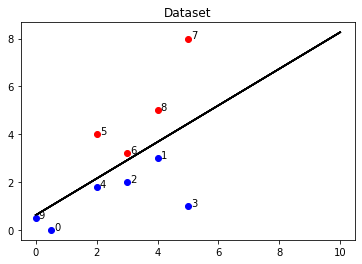

In [ ]:
cor=['bo','ro']
plt.title('Dataset')
for i in range(len(X)):
  plt.text(X[i,0]+0.1,X[i,1],str(i))
  plt.plot(X[i,0],X[i,1],cor[ypred[i]])
  plt.plot([0,10],[x2(0,-0.63976828,-0.78943197,1.03284965),x2(10,-0.63976828,-0.78943197,1.03284965)],color='black')#reta
plt.show()

In [5]:
0.78943197/1.03284965

0.7643241879396484

In [6]:
0.63976828/1.03284965

0.6194205323107773